#### Question 1

In [33]:
import numpy as np
import scipy.stats as stats
import pandas as pd

data = pd.read_csv("projectdata.csv")
data.Weight.describe()

count     44.000000
mean     143.954545
std       28.788688
min      101.000000
25%      119.500000
50%      140.000000
75%      165.000000
max      218.000000
Name: Weight, dtype: float64

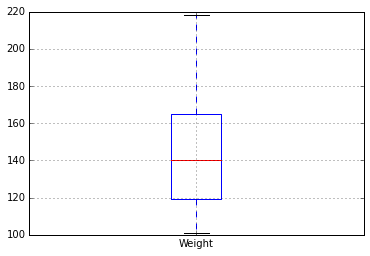

In [34]:
%matplotlib inline
data.boxplot('Weight', return_type='axes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faaeb63c110>]], dtype=object)

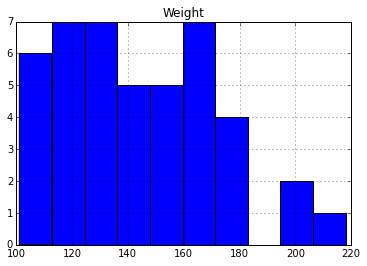

In [35]:
data.hist('Weight')

There does not appear to be any mistaken entries for the weight data.

#### Question 2

In [42]:
data['Gender'] = data['Gender'].astype('category')

In [43]:
data.Gender.describe()

count     44
unique     3
top        F
freq      25
Name: Gender, dtype: object

Only one bad value for Gender: the first row of the data has an * presumably denoting unknown or unreported Gender.

#### Question 3